In [6]:
import keras
import kashgari
from kashgari.tasks.labeling import BiLSTM_CRF_Model
from kashgari.embeddings import BERTEmbedding
import matplotlib.pyplot as plt

In [7]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('loss')
        plt.legend(loc="upper right")
        plt.show()

In [8]:
# 初始化训练数据
train_x = []
train_y = []

with open('train_zi.txt', 'r', encoding='utf-8') as f:
    tmp_x = []
    tmp_y = []
    for i in f.readlines():
        if i == '\n':
            train_x.append(tmp_x)
            train_y.append(tmp_y)
            tmp_x = []
            tmp_y = []
        else:
            x, y = i.split(' ')
            tmp_x.append(x)
            tmp_list = y.split('-')
            if len(tmp_list) == 1:
                tmp_y.append(tmp_list[0].replace('\n', ''))
            else:
                tmp_str = tmp_list[0] + '-' + tmp_list[1].replace('\n', '')
                tmp_y.append(tmp_str)

In [9]:
# 初始化测试数据
test_x = []
test_y = []

with open('test_zi.txt', 'r', encoding='utf-8') as f:
    tmp_x = []
    tmp_y = []
    for i in f.readlines():
        if i == '\n':
            test_x.append(tmp_x)
            test_y.append(tmp_y)
            tmp_x = []
            tmp_y = []
        else:
            x, y = i.split(' ')
            tmp_x.append(x)
            tmp_list = y.split('-')
            if len(tmp_list) == 1:
                tmp_y.append(tmp_list[0].replace('\n', ''))
            else:
                tmp_str = tmp_list[0] + '-' + tmp_list[1].replace('\n', '')
                tmp_y.append(tmp_str)

In [10]:
# 初始化验证数据
dev_x = []
dev_y = []

with open('dev_zi.txt', 'r', encoding='utf-8') as f:
    tmp_x = []
    tmp_y = []
    for i in f.readlines():
        if i == '\n':
            dev_x.append(tmp_x)
            dev_y.append(tmp_y)
            tmp_x = []
            tmp_y = []
        else:
            x, y = i.split(' ')
            tmp_x.append(x)
            tmp_list = y.split('-')
            if len(tmp_list) == 1:
                tmp_y.append(tmp_list[0].replace('\n', ''))
            else:
                tmp_str = tmp_list[0] + '-' + tmp_list[1].replace('\n', '')
                tmp_y.append(tmp_str)

In [11]:
bert_embed = BERTEmbedding('chinese_L-12_H-768_A-12',
                           task=kashgari.LABELING,
                           sequence_length=256)

In [12]:
model = BiLSTM_CRF_Model(bert_embed)

In [13]:
kashgari.config.use_cudnn_cell = True

In [14]:
history = LossHistory()

In [15]:
model.fit(train_x,
          train_y,
          dev_x,
          dev_y,
          epochs=1000,
          batch_size=64,
          callbacks=[history])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 256)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 256, 768), ( 16226304    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 256, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [16]:
model.evaluate(test_x, test_y)

           precision    recall  f1-score   support

   Things     0.9432    0.9648    0.9539      1223
   Person     0.9822    0.9865    0.9843      2071
     Time     0.9792    0.9814    0.9803       862
    Steal     0.9583    0.9661    0.9622       738
    Money     0.9724    0.9749    0.9737       796
 Location     0.8735    0.8870    0.8802       903
    Count     0.9933    0.9803    0.9868       761
  Consume     0.9412    0.9756    0.9581        82
     Draw     0.9746    0.9777    0.9762       314
Volunteer     0.9362    0.9167    0.9263        48
     Sale     0.9028    0.9559    0.9286        68

micro avg     0.9592    0.9663    0.9628      7866
macro avg     0.9595    0.9663    0.9629      7866



'           precision    recall  f1-score   support\n\n   Things     0.9432    0.9648    0.9539      1223\n   Person     0.9822    0.9865    0.9843      2071\n     Time     0.9792    0.9814    0.9803       862\n    Steal     0.9583    0.9661    0.9622       738\n    Money     0.9724    0.9749    0.9737       796\n Location     0.8735    0.8870    0.8802       903\n    Count     0.9933    0.9803    0.9868       761\n  Consume     0.9412    0.9756    0.9581        82\n     Draw     0.9746    0.9777    0.9762       314\nVolunteer     0.9362    0.9167    0.9263        48\n     Sale     0.9028    0.9559    0.9286        68\n\nmicro avg     0.9592    0.9663    0.9628      7866\nmacro avg     0.9595    0.9663    0.9629      7866\n'

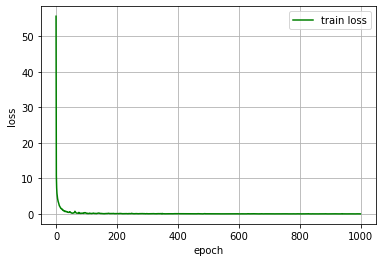

In [17]:
history.loss_plot('epoch')

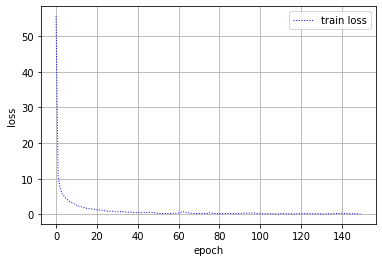

In [33]:
iters = range(len(history.losses['epoch'][:150]))
plt.figure()
# loss
plt.plot(iters, history.losses['epoch'][:150], 'b', label='train loss', lw=1, linestyle=':')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.rcParams['savefig.dpi'] = 200
plt.savefig('loss.png')
plt.show()